In [41]:
import numpy as np
import sep

In [42]:
# import astropy.io.fits as fits
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [43]:
hdul = fits.open(r"C:\\Users\\alita\\Downloads\\data\\image.fits")
data = hdul[0].data

In [44]:
# measure a spatially varying background on the image
bkg = sep.Background(data)

In [45]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [46]:
# evaluate background as 2-d array, same size as original image
#bkg_image = bkg.back()
bkg_image = np.array(bkg) # equivalent to above

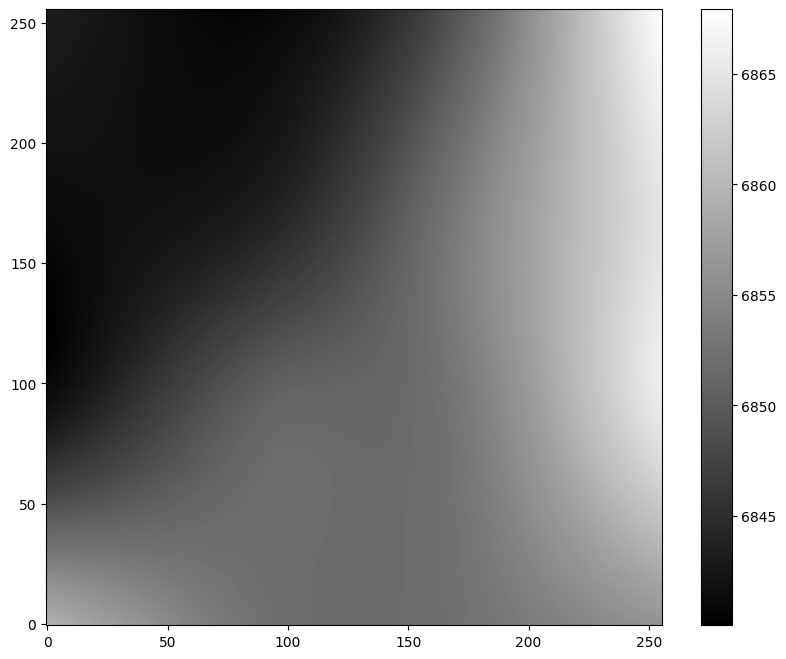

In [47]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('final_image2.png')

In [48]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

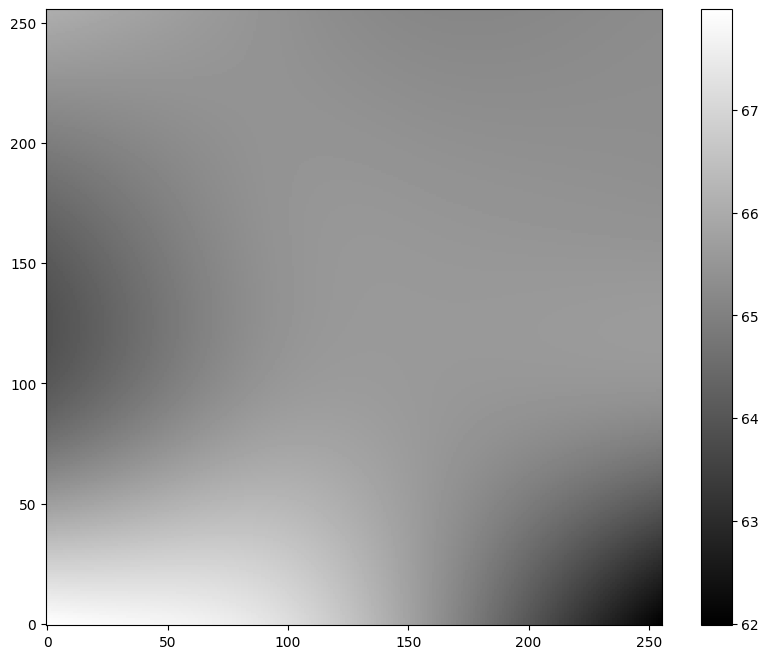

In [49]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('final_image3.png')

In [50]:
# subtract the background
data_sub = data - bkg

In [51]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [52]:
# how many objects were detected
len(objects)

68

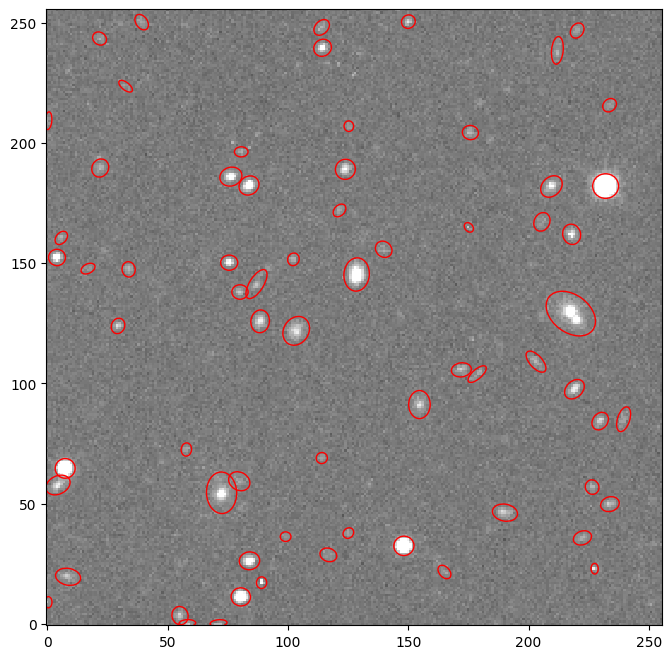

In [53]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('final_image4.png')

In [54]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [55]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [56]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138


In [57]:
hdul =  fits.open(r"C:\Users\alita\Downloads\data\hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits") 
data = hdul[0].data

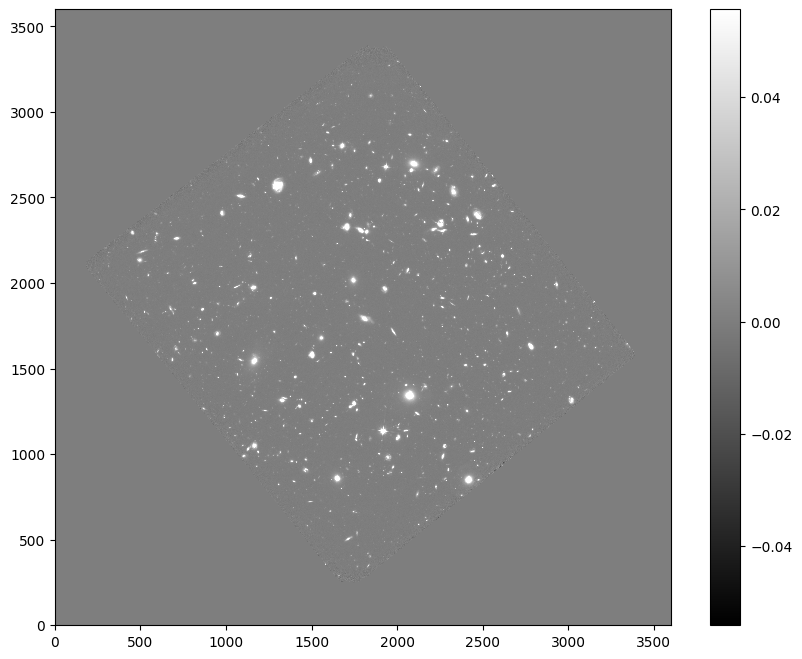

In [58]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('HUDF_image.png')

In [59]:
# measure a spatially varying background on the image
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

In [60]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [61]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()

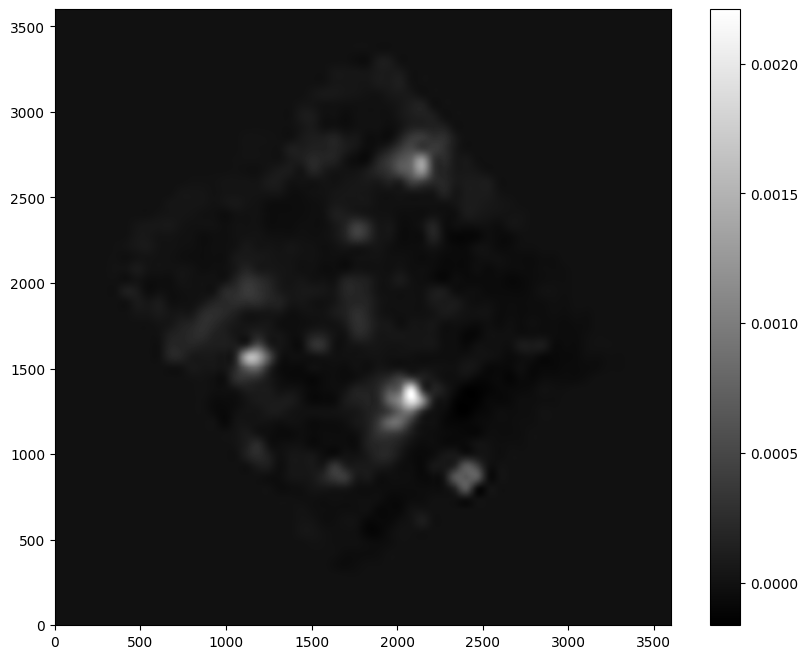

In [62]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('HUDF_bkg.png')

In [63]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

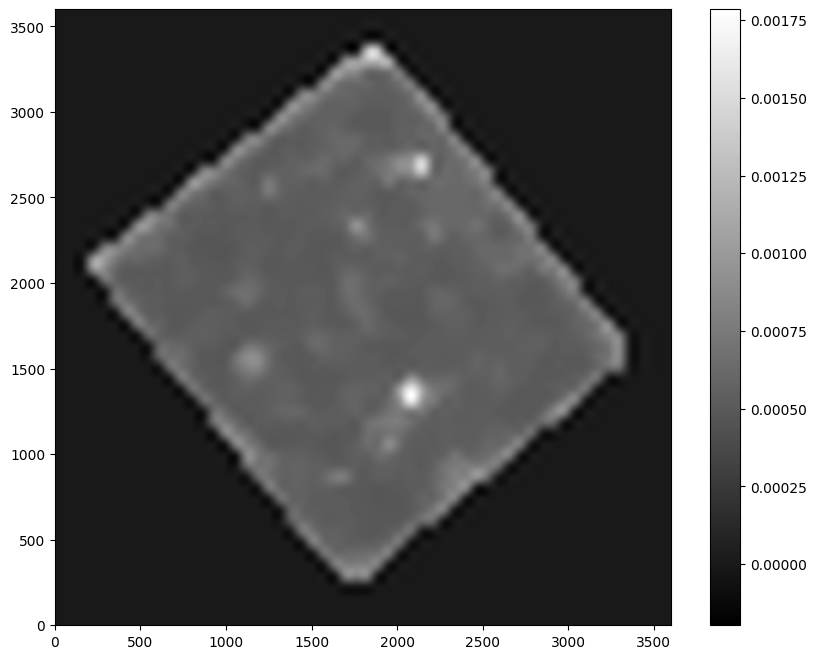

In [64]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('HUDF_noise.png')

In [65]:
# subtract the background
data_sub = data - bkg

In [66]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [67]:
# how many objects were detected
len(objects)

8644

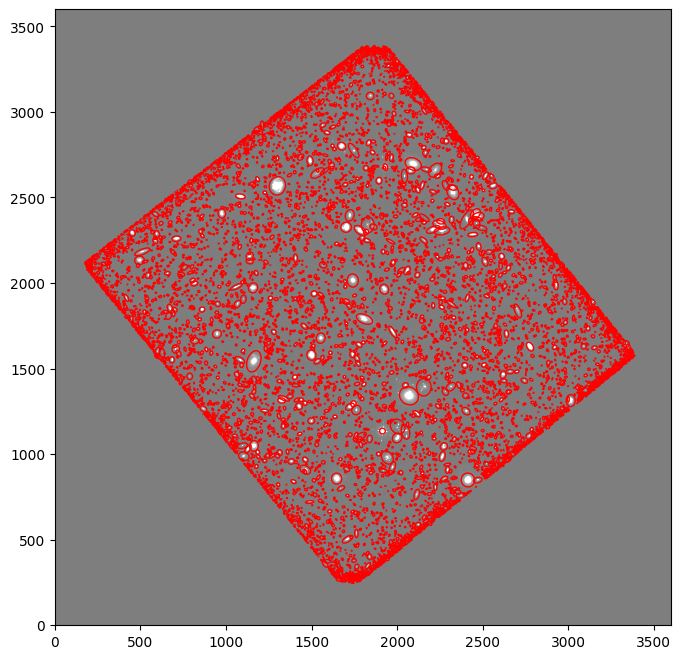

In [68]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('HUDF_sources.png')

In [69]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [70]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [71]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


Number of sources: 8644


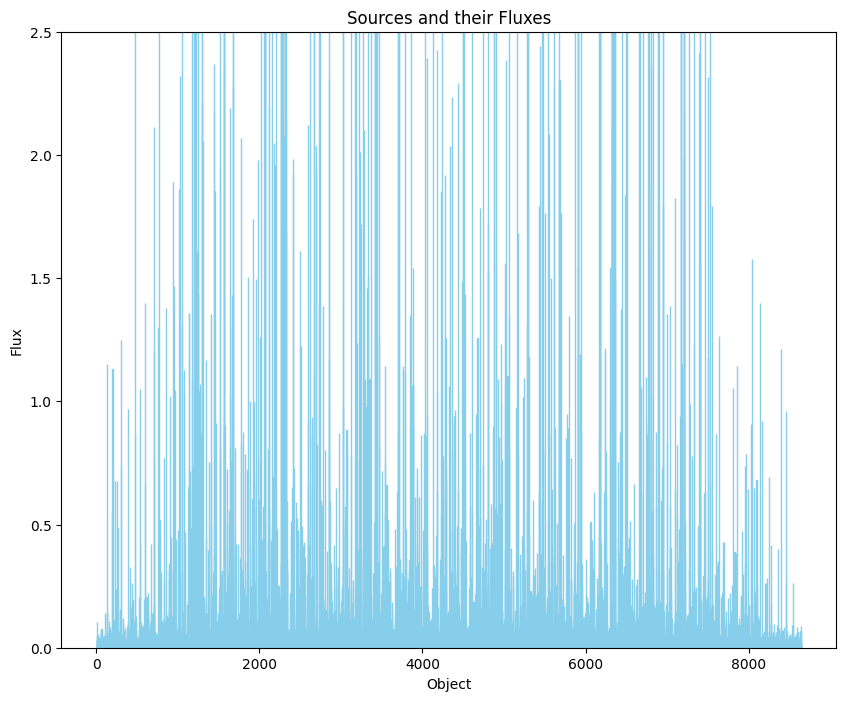

In [72]:
num_sources = len(objects)
print(f"Number of sources: {num_sources}")

plt.hist(range(1, num_sources + 1), weights=flux, bins=num_sources, edgecolor='skyblue', range=(0.5, num_sources + 0.5), color='skyblue')

# Label axes
plt.xlabel('Object')
plt.ylabel('Flux')

# Set y-axis (flux) limit
plt.ylim(0, 2.5)

# Add title
plt.title('Sources and their Fluxes')

# Show plot
plt.show()


In [73]:
mean_flux = np.mean(flux)
median_flux = np.median(flux)
std_dev_flux = np.std(flux)

print("Mean of Flux:", mean_flux)
print("Median of Flux:", median_flux)
print("Standard Deviation of Flux:", std_dev_flux)

#finding the largest outlier
largest_outlier_index = np.argmax(flux)
largest_outlier = flux[largest_outlier_index]

#calculate distance which is outlier minus mean divided by std_dev
distance = np.abs(largest_outlier - mean_flux) / std_dev_flux

print("Largest Outlier Value:", largest_outlier)
print("Distance from Mean (in measurements of standard deviations):", distance)

Mean of Flux: 0.3616796671440877
Median of Flux: 0.030954037816263734
Standard Deviation of Flux: 9.241392728878186
Largest Outlier Value: 807.2972835731507
Distance from Mean (in measurements of standard deviations): 87.31753184608579


In [74]:
#create 3 Color False Image
hdu_2 = fits.open(r"C:\Users\alita\Downloads\data\hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")
hdu_3 = fits.open(r"C:\Users\alita\Downloads\data\hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")

#extract the image data
data_2 = hdu_2[0].data
data_3 = hdu_3[0].data

In [75]:
#rescale image function
def rescale_image(data):
    # copy the data to avoid accidentaly overwriting it
    pdata_tmp = data.copy()

    # compute the mean value over all data, excluding NaN (Not a Number)
    m = np.nanmean(pdata_tmp)

    # if lower than vpmin, apply vpmin
    # if higher than vpmax, apply vpmax
    vpmin = 0.5*m
    vpmax = 100*m
    pdata_tmp[pdata_tmp<vpmin] = vpmin
    pdata_tmp[pdata_tmp>vpmax] = vpmax

    #apply logscale
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp

In [76]:
#rescale image
data_2_res = rescale_image(data_2)
data_3_res = rescale_image(data_3)
data_res = rescale_image(data)

In [77]:
data_all  = np.zeros((data_2.shape[0],data_2.shape[1],3))
data_all[:,:,0] = data_2
data_all[:,:,1] = data_3
data_all[:,:,2] = data
data_all = rescale_image(data_all)

In [78]:
#make a function to map arrays to[0,1]
def remap(data):
    pdata_tmp = data.copy()

    dmin = pdata_tmp.min()
    dmax = pdata_tmp.max()
    return (pdata_tmp - dmin)/(dmax-dmin)

In [79]:
rgb_image = np.zeros((data_2.shape[0],data_2.shape[1],3))
rgb_image = remap(data_all)

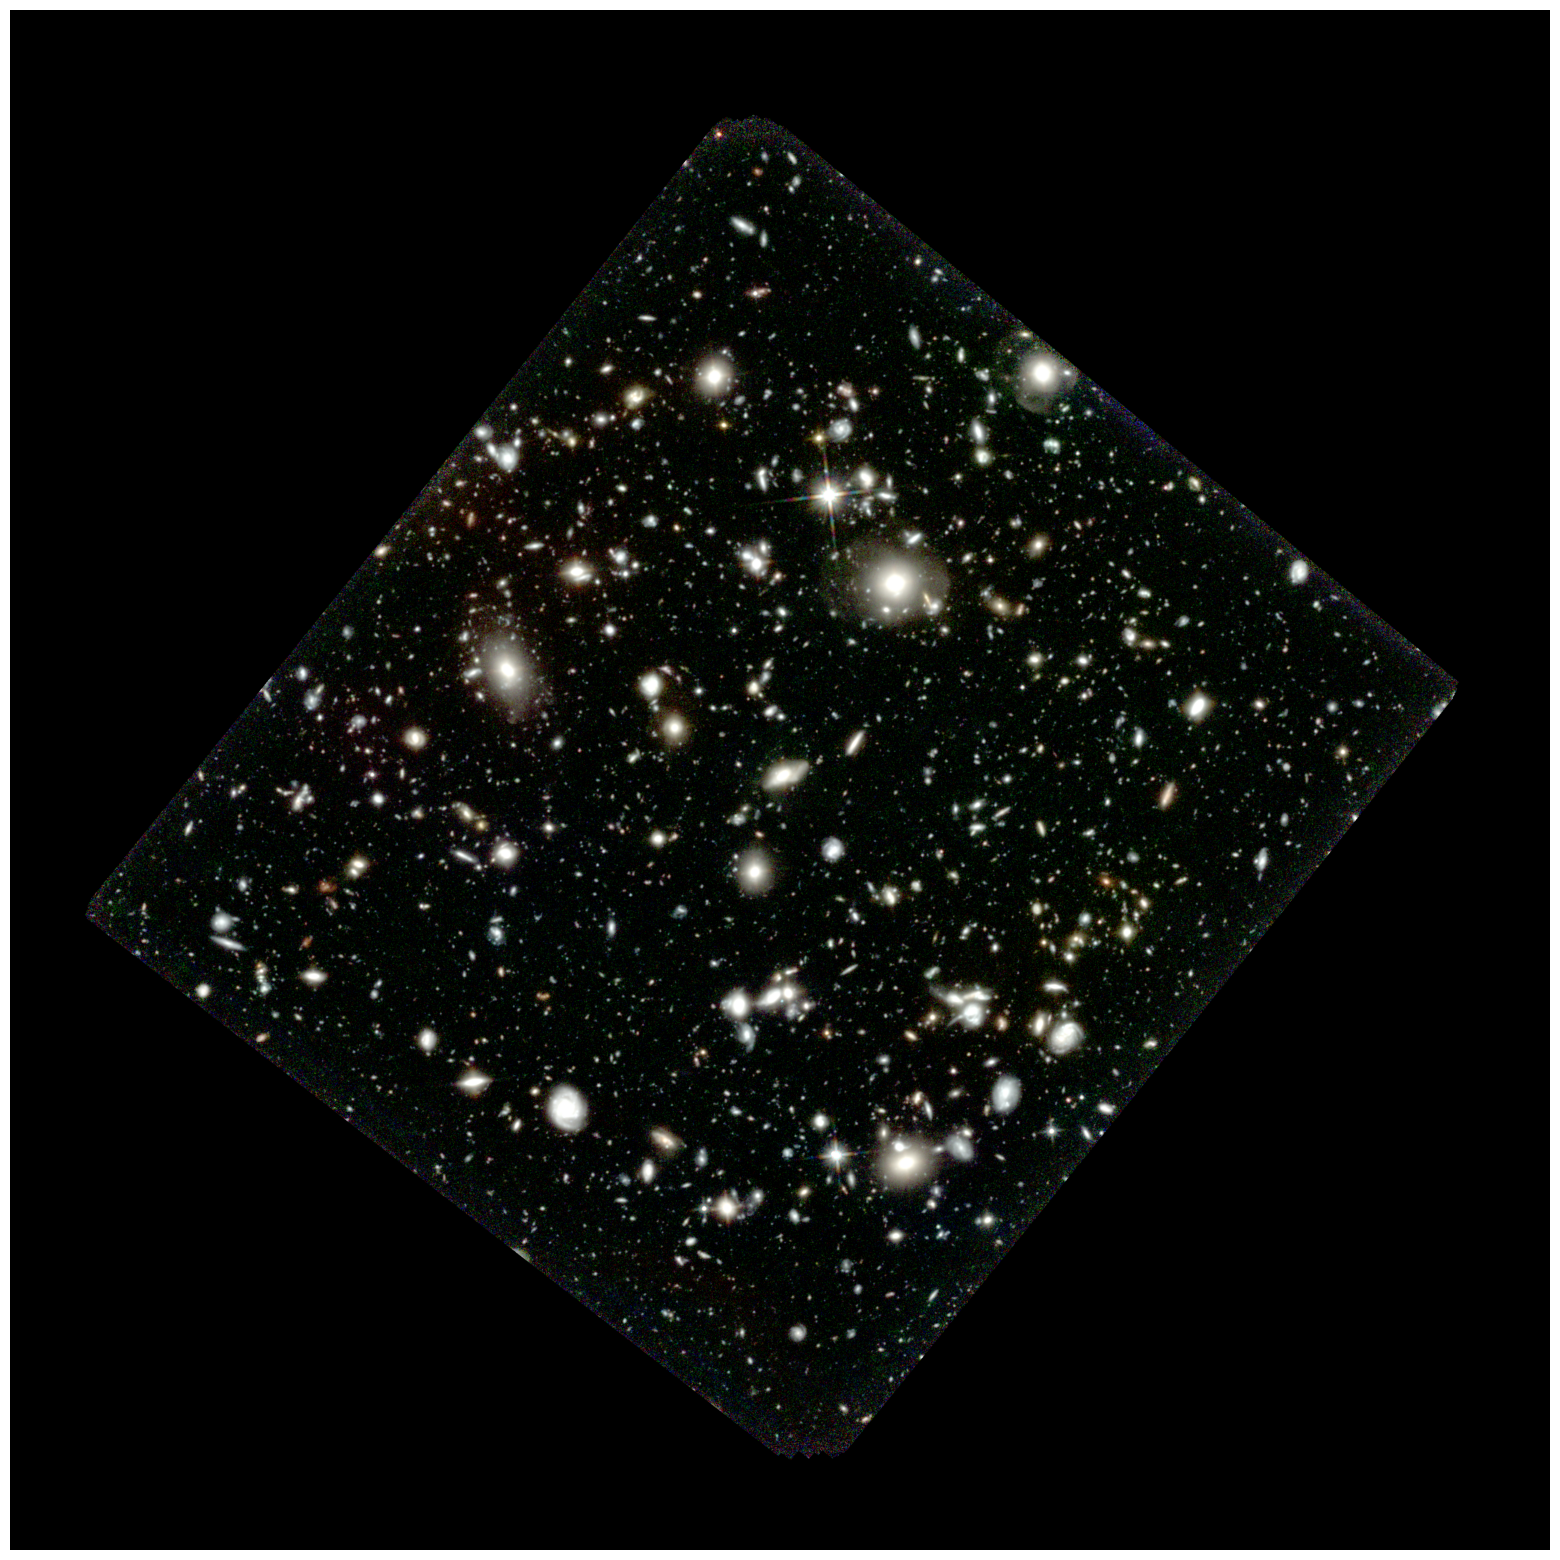

In [80]:
f,ax = plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow(rgb_image)
plt.savefig('false_image.png',bbox_inches='tight',pad_inches=0,dpi=600)